In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Carregar os dados
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Definicao dos hiperparametros para otimização 
param_grid = {
    'n_neighbors' : [3,5,7,9,11], 
    'metric' : ['euclidean', 'manhattan']
}

In [16]:
knn = KNeighborsClassifier()

In [17]:
#Configurar o otimizador
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
# Treina o modelo
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [20]:
#Obtendo os resultados
resultados = gridsearch.cv_results_
for i, params in enumerate(resultados['params']): 
    print(f"Combinação {i+1}: {params} - Acurácia: {resultados['mean_test_score'][i]:.2f}")

Combinação 1: {'metric': 'euclidean', 'n_neighbors': 3} - Acurácia: 0.96
Combinação 2: {'metric': 'euclidean', 'n_neighbors': 5} - Acurácia: 0.94
Combinação 3: {'metric': 'euclidean', 'n_neighbors': 7} - Acurácia: 0.94
Combinação 4: {'metric': 'euclidean', 'n_neighbors': 9} - Acurácia: 0.93
Combinação 5: {'metric': 'euclidean', 'n_neighbors': 11} - Acurácia: 0.95
Combinação 6: {'metric': 'manhattan', 'n_neighbors': 3} - Acurácia: 0.96
Combinação 7: {'metric': 'manhattan', 'n_neighbors': 5} - Acurácia: 0.94
Combinação 8: {'metric': 'manhattan', 'n_neighbors': 7} - Acurácia: 0.94
Combinação 9: {'metric': 'manhattan', 'n_neighbors': 9} - Acurácia: 0.94
Combinação 10: {'metric': 'manhattan', 'n_neighbors': 11} - Acurácia: 0.95


In [21]:
import pandas as pd
df = pd.DataFrame(resultados)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001864,0.000360,0.004507,0.000639,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.958333,1.000000,0.875000,1.0,0.958333,0.958333,0.045644,1
1,0.001261,0.000381,0.004916,0.001668,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,5
2,0.001125,0.000077,0.004247,0.001053,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,5
3,0.001238,0.000396,0.005888,0.002449,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.958333,0.916667,0.833333,1.0,0.958333,0.933333,0.056519,10
4,0.000794,0.000397,0.004608,0.001350,euclidean,11,"{'metric': 'euclidean', 'n_neighbors': 11}",1.000000,0.958333,0.833333,1.0,0.958333,0.950000,0.061237,3
5,0.001207,0.000409,0.003993,0.000632,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.958333,1.000000,0.875000,1.0,0.958333,0.958333,0.045644,1
6,0.001199,0.000371,0.004188,0.000962,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,5
7,0.001003,0.000010,0.003714,0.000399,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,5
8,0.000719,0.000407,0.004032,0.000573,manhattan,9,"{'metric': 'manhattan', 'n_neighbors': 9}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,5
9,0.000804,0.000402,0.003590,0.000799,manhattan,11,"{'metric': 'manhattan', 'n_neighbors': 11}",1.000000,0.958333,0.833333,1.0,0.958333,0.950000,0.061237,3


In [22]:
gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

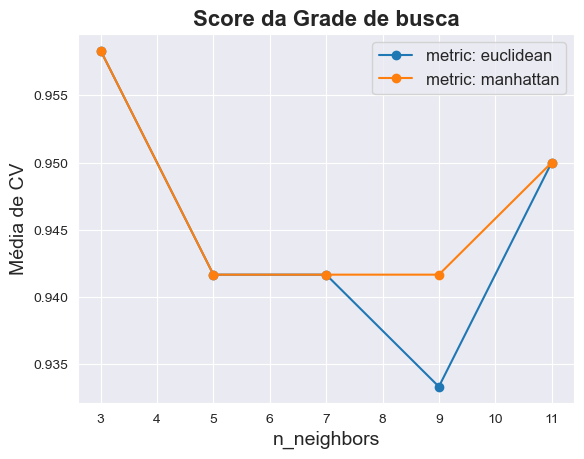

In [27]:
# Plotando o gráfico
import matplotlib.pyplot as plt
import numpy as np
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param1, name_param2):
    scores_means= cv_results['mean_test_score']
    scores_means = np.array(scores_means).reshape(len(grid_param_2), len(grid_param_1))

    scores_std= cv_results['mean_test_score']
    scores_std = np.array(scores_means).reshape(len(grid_param_2), len(grid_param_1))
    #Plotar os scores da busca
    _,ax = plt.subplots(1,1)
    #Param_1 é o eixo X, param2 é representado por diferente cores de linha
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_means[idx,:], '-o', label=name_param2 + ': ' + str(val))
    ax.set_title('Score da Grade de busca', fontsize=16, fontweight='bold')
    ax.set_xlabel(name_param1, fontsize='14')
    ax.set_ylabel("Média de CV", fontsize='14')
    ax.legend(loc='best', fontsize='12')
    ax.grid('on')
    
plot_grid_search(resultados, param_grid['n_neighbors'], param_grid['metric'],'n_neighbors', 'metric')
        